### Visualización movilidad Madrid por zonas

In [1]:
# cargar datos

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('PredBrMurHoras7d.csv')
df['time']=pd.to_datetime(df['time'])
df.set_index('time',inplace=True)
df.head()


,value
time,
2021-07-01 00:00:00,262
2021-07-01 01:00:00,214
2021-07-01 02:00:00,134
2021-07-01 03:00:00,102
2021-07-01 04:00:00,75


In [4]:
len(df)

913

In [5]:
# visualizamos los datos de previsión
dfreal = df.iloc[:745]
dfprev = df.iloc[745:]

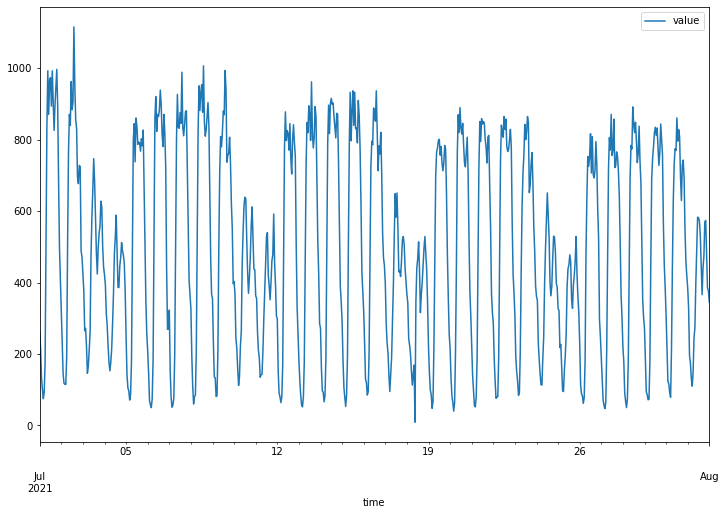

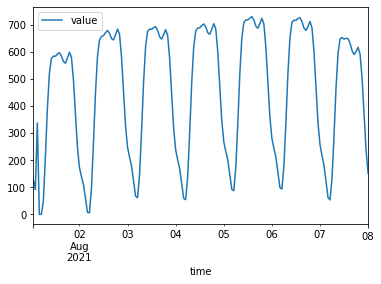

In [6]:
dfreal.plot(legend=True,label='Real',figsize=(12,8))
dfprev.plot(legend=True,label='Previsión')

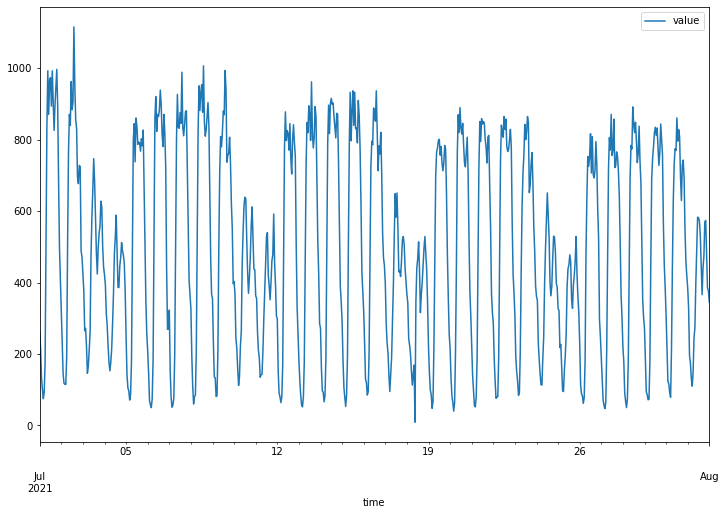

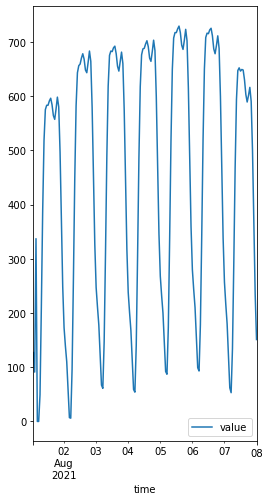

In [7]:
ax1 = dfreal.plot(legend=True,label='Real',figsize=(12,8))
ax2 = dfprev.plot(legend=True,label='Previsión',figsize=(4,8))
ax2.autoscale(axis='x',tight=True)
ax2.legend(loc=4, bbox_to_anchor=(1.0,0));

In [8]:
def descripcionDatosDataset(datos):
    print("Cantidad de filas:", datos.shape[0])
    print("Cantidad de columnas:", datos.shape[1])
    print('-'*100)
    for columna in datos.columns:
        valoresDescripcion = ''
        tipo = ''
        if datos[columna].dtype == 'float64' or datos[columna].dtype == 'int64':
            tipo = 'numérico'
            valoresDescripcion = datos[columna].agg(['min', 'max', 'mean', 'std', 'median'])
        else:
            tipo = 'nominal' #categórico | string | no-numérico
            valoresDescripcion = {'valoresPresentes' : datos[columna].unique(), 
                                  'cantidadNulos' : datos[columna].isna().sum()}
                                 #'conteoValores' : pd.value_counts(datos[columna])}
        print('Columna: ' + columna)
        print('Tipo de datos: ' + tipo)
        print('Descripción de valores:')
        if tipo == 'numérico':
            print(valoresDescripcion)
        else:
            print('-- Valores presentes (10 primeros): ' + str(valoresDescripcion['valoresPresentes'][:10]))
            pctNulos = (valoresDescripcion['cantidadNulos'] / datos.shape[0]) * 100
            print('-- Cantidad de nulos: ' + str(valoresDescripcion['cantidadNulos']) + ' = ' + "{0:.2f}".format(pctNulos) + '%')
        print('-'*100)

In [9]:
datos = dfreal
descripcionDatosDataset(datos)

Cantidad de filas: 745
Cantidad de columnas: 1
----------------------------------------------------------------------------------------------------
Columna: value
Tipo de datos: numérico
Descripción de valores:
min          9.000000
max       1116.000000
mean       502.626846
std        282.534945
median     484.000000
Name: value, dtype: float64
----------------------------------------------------------------------------------------------------


In [10]:
datos = dfprev
descripcionDatosDataset(datos)

Cantidad de filas: 168
Cantidad de columnas: 1
----------------------------------------------------------------------------------------------------
Columna: value
Tipo de datos: numérico
Descripción de valores:
min         0.000000
max       729.000000
mean      456.303571
std       236.353707
median    575.500000
Name: value, dtype: float64
----------------------------------------------------------------------------------------------------


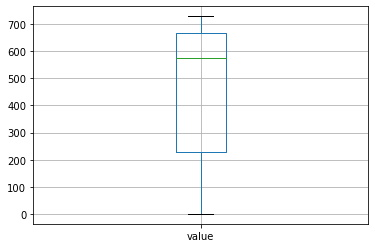

In [13]:
boxplot = dfprev.boxplot(column=['value'])